**Spam email Detection project**

**1.Business Understanding:**

This project addresses a real-world business problem by applying machine learning and NLP techniques to automatically detect spam messages. The proposed solution helps organizations maintain secure and clean communication systems while enhancing user experience.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

**We import libraries for:**

* Data handling (pandas, numpy)
* Visualization (matplotlib, seaborn)
* Machine learning (sklearn)

In [2]:
#Loading the dataset
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


* We load the dataset and display the first 5 rows.

In [4]:
#getting more data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


**This shows:**

* Number of rows and columns
* Data types
* Statistical summary

**Dataset Cleaning**

The dataset has extra unnamed columns.

In [5]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.columns

Index(['label', 'message'], dtype='object')

**Basic EDA (Exploratory Data Analysis)**

In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

**Explanation:**

* ham → normal message

* spam → unwanted message

* Dataset is imbalanced

**Visualize distribution**

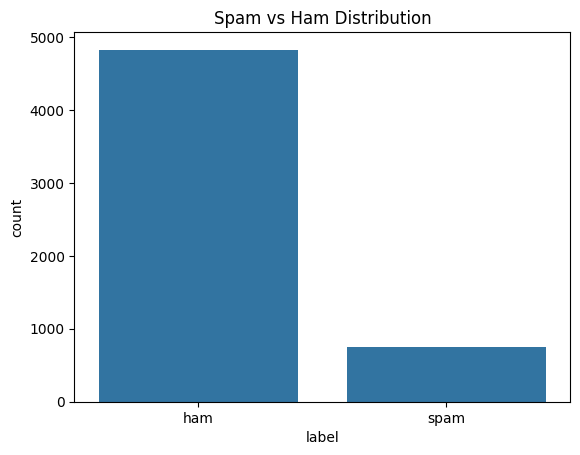

In [9]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

**The Spam vs Ham distribution plot provides an important exploratory data analysis (EDA) insight. It highlights the imbalance in the dataset and guides the selection of appropriate preprocessing and evaluation strategies for effective spam detection.**

In [10]:
# Label Encoding
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


* ML models understand numbers, not text labels.

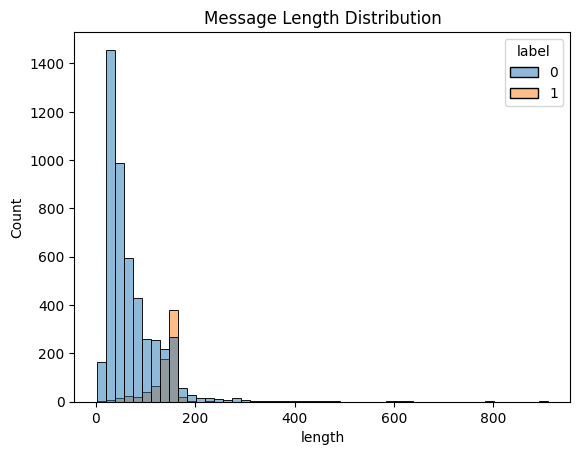

In [11]:
#Message Length Distribution

df['length'] = df['message'].apply(len)

sns.histplot(data=df, x='length', hue='label', bins=50)
plt.title("Message Length Distribution")
plt.show()

**The Message Length Distribution plot provides valuable insights into the structural differences between spam and ham messages. It plays a crucial role in exploratory data analysis by helping understand text characteristics before applying NLP and machine learning models.**

**Message Length by Class (Box Plot)**

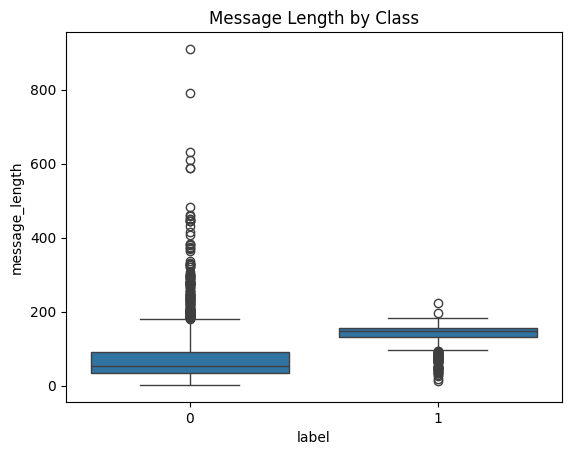

In [12]:
df['message_length'] = df['message'].apply(len)
sns.boxplot(x='label', y='message_length', data=df)
plt.title("Message Length by Class")
plt.show()


In [13]:
#checking missing values 
df.isna().sum()

label             0
message           0
length            0
message_length    0
dtype: int64

In [14]:
#Download Required Resources 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#Text Cleaning Function (NLP Basics)

stop_words = set(stopwords.words('english'))

In [16]:
#Text Cleaning Function

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize text
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Join words back into a single string
    return " ".join(words)


In [17]:
# Apply Cleaning to Dataset
df['clean_message'] = df['message'].apply(clean_text)
df.head()

,label,message,length,message_length,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",111,111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,nah think goes usf lives around though


In [18]:
# Example (Before vs After)
df[['message', 'clean_message']].head()

,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


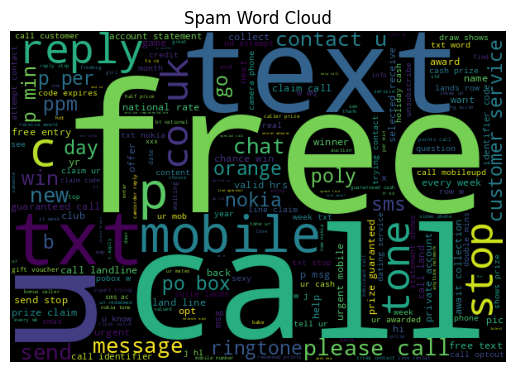

In [19]:
#Word Cloud (Spam vs Ham)

from wordcloud import WordCloud

spam_words = " ".join(df[df['label']==1]['clean_message'])
wordcloud = WordCloud(width=600, height=400).generate(spam_words)

plt.imshow(wordcloud)
plt.axis('off')
plt.title("Spam Word Cloud")
plt.show()

**The Spam Word Cloud provides a clear and intuitive visualization of the most frequent words found in spam messages. It plays an important role in exploratory data analysis by revealing hidden patterns and supporting the effectiveness of NLP-based spam detection models.**

**🔥 Heatmaps Used in Spam email Detection Project**

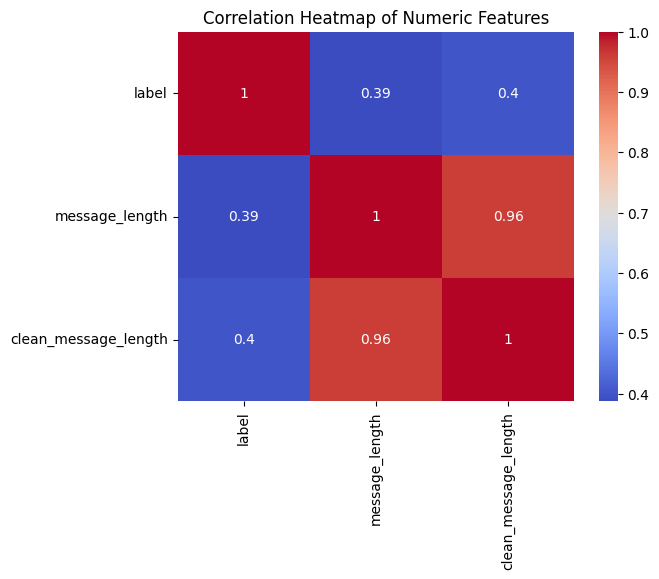

In [20]:
# Create numeric features
df['message_length'] = df['message'].apply(len)
df['clean_message_length'] = df['clean_message'].apply(len)

# Correlation matrix
corr_matrix = df[['label', 'message_length', 'clean_message_length']].corr()

# Plot heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

* Shows relationship between spam label and message lengths

* Positive correlation indicates spam messages are usually longer

* Helps in understanding data before modeling

**Train-Test Split:**

In [21]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
X_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: message, Length: 4457, dtype: object

In [23]:
y_train

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label, Length: 4457, dtype: int64

**Text Vectorization using TF-IDF**

In [24]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [25]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29903 stored elements and shape (4457, 3000)>

* TF (Term Frequency) → word importance in a message

* IDF (Inverse Document Frequency) → reduces common words impact

**Model 1 – Naive Bayes**

In [26]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)


In [27]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.97847533632287
[[965   0]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



**📌 Why Naive Bayes?**

* Very fast

* Works extremely well for text classification

**Model 2 – Logistic Regression**

In [28]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9641255605381166
[[962   3]
 [ 37 113]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.75      0.85       150

    accuracy                           0.96      1115
   macro avg       0.97      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



****Confusion Matrix – Naive Bayes****

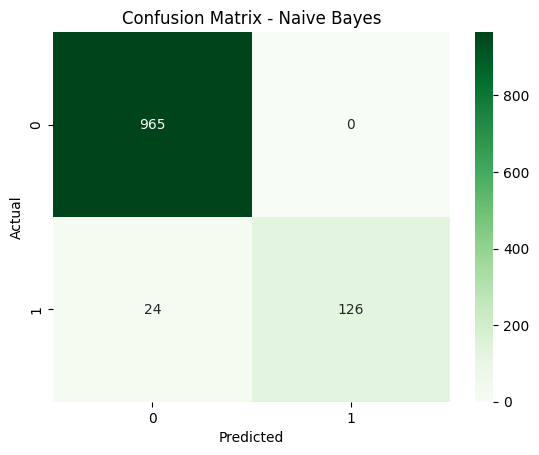

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb),
            annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

**The confusion matrix for Naive Bayes provides a detailed view of the model’s classification performance. It helps identify strengths and weaknesses of the classifier in detecting spam messages and guides further improvements.**

**Confusion Matrix (Logistic Regression)**

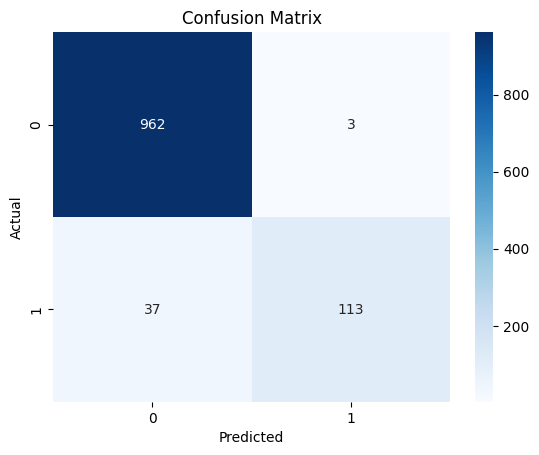

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#Model Comparison (Optional)

comparison_df = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_lr)
    ],
    "Precision": [
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_lr)
    ],
    "Recall": [
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_lr)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_lr)
    ]
})

comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.978475,1.000000,0.840000,0.913043
1,Logistic Regression,0.964126,0.974138,0.753333,0.849624


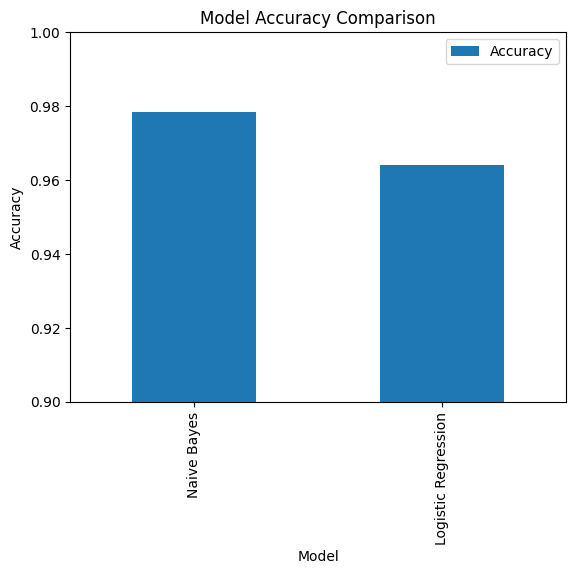

In [33]:
#(Optional) Visual Comparison – Accuracy Bar Plot

comparison_df.set_index("Model")[["Accuracy"]].plot(kind="bar")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

* This plot visually compares model accuracy and helps justify the selection of Logistic Regression as the final model.

**🔮 Predict New Message**

In [34]:
def predict_message(text, model, vectorizer):
    # Clean the input text
    cleaned_text = clean_text(text)
    
    # Convert text to TF-IDF features
    text_tfidf = vectorizer.transform([cleaned_text])
    
    # Predict using trained model
    prediction = model.predict(text_tfidf)[0]
    
    return "Spam" if prediction == 1 else "Ham"

In [35]:
message1 = "Congratulations! You have won a free mobile recharge. Click now!"
predict_message(message1, lr_model, tfidf)

'Spam'

In [36]:
message2 = "Hey, are we meeting today at 5 pm?"
predict_message(message2, lr_model, tfidf)

'Ham'

**Conclusion:**

* This project implements an SMS spam detection system using NLP and machine learning. TF-IDF was used for feature extraction, and Logistic Regression achieved the best performance. The model successfully classifies new messages as spam or ham, demonstrating its real-world usability.